# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [34]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_metadata_study_results_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
mouse_metadata_study_results_complete

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [35]:
#Checking the number of mice.
mouse_count= len(mouse_metadata_study_results_complete["Mouse ID"].unique())
mouse_count

249

In [36]:
#Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_id = mouse_metadata_study_results_complete.loc[mouse_metadata_study_results_complete.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate_mouse_id

array(['g989'], dtype=object)

In [37]:
# Optional: Get all the data for the duplicate mouse ID. 


In [38]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_dataframe = mouse_metadata_study_results_complete.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
clean_dataframe

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [39]:
# Checking the number of mice in the clean DataFrame.
clean_dataframe_mouse_count = clean_dataframe["Mouse ID"].unique()
clean_mouse_count = len(clean_dataframe_mouse_count)
clean_mouse_count

249

## Summary Statistics

In [40]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_regimen_data = clean_dataframe.set_index(["Drug Regimen"])
drug_regimen_group = drug_regimen_data.groupby("Drug Regimen")
drug_regimen_mean = drug_regimen_group["Tumor Volume (mm3)"].mean()
drug_regimen_median = drug_regimen_group["Tumor Volume (mm3)"].median()
drug_regimen_variance = drug_regimen_group["Tumor Volume (mm3)"].var()
drug_regimen_standev = drug_regimen_group["Tumor Volume (mm3)"].std()
drug_regimen_sem = drug_regimen_group["Tumor Volume (mm3)"].sem()
# Assemble the resulting series into a single summary DataFrame.
drug_regimen_summary = pd.DataFrame({"Mean Tumor Volume": drug_regimen_mean,
                                     "Median Tumor Volume": drug_regimen_median,
                                     "Tumor Volume Variance": drug_regimen_variance,
                                     "Tumor Volume Std. Dev.": drug_regimen_standev,
                                     "Tumor Volume Std. Err.": drug_regimen_sem})
drug_regimen_summary


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [41]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
aggregation_drug_regimen_summary = drug_regimen_data.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean","median","var","std","sem"])

# Using the aggregation method, produce the same summary statistics in a single line.
aggregation_drug_regimen_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen', ylabel='Number of Mice Tested'>

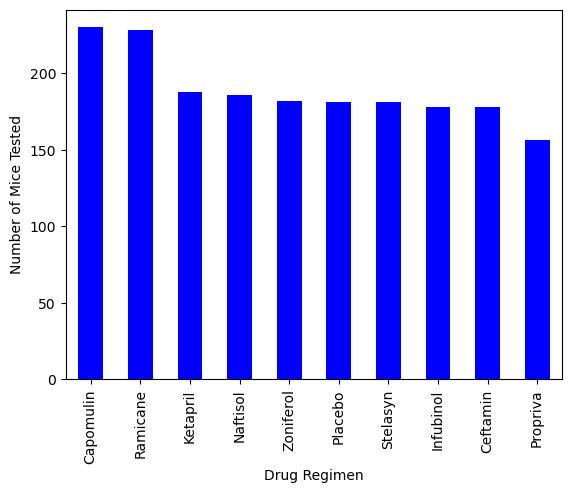

In [42]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
#use timepoints & drug regimen for generating bar & pie chart. bar chart is created by .plot()
total_mice_and_drugs = clean_dataframe[["Drug Regimen","Timepoint"]]
total_mice_per_drugs = total_mice_and_drugs["Drug Regimen"].value_counts()

total_mice_per_drugs.plot(kind="bar",color="b",
                          xlabel="Drug Regimen",
                          ylabel="Number of Mice Tested")


<function matplotlib.pyplot.show(close=None, block=None)>

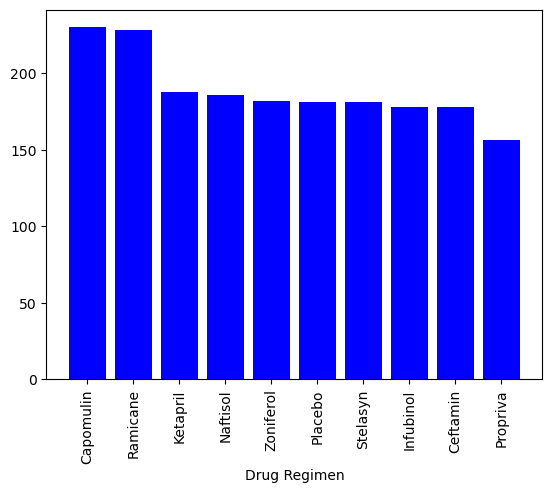

In [43]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
#total # of timepoints
 #all mice=per mice
#each drug regimen = per drug regimen
drug_regimen = total_mice_per_drugs.index.values
mouseondrugs= total_mice_per_drugs.values
#display
plt.bar(drug_regimen,mouseondrugs, color="b")
plt.xlabel('Drug Regimen')
#plt.ylabel('Number of Mice Tested')
plt.xticks(rotation=90)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

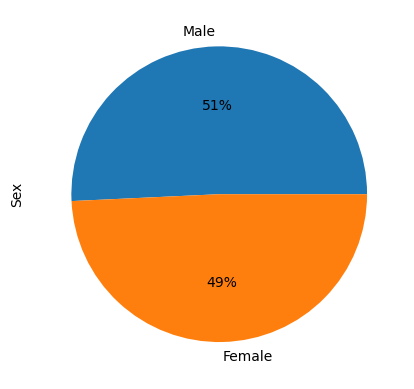

In [44]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
female_vs_male = clean_dataframe["Sex"].value_counts()
Sex = ["Male", "Female"]
female_vs_male.plot(kind = "pie", ylabel = "Sex", autopct = "%1.0f%%")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

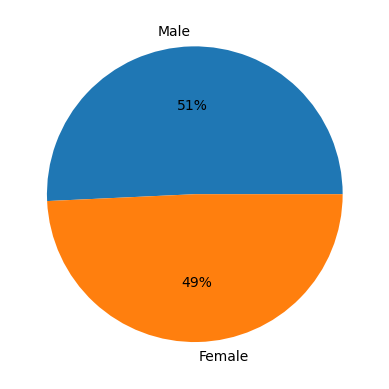

In [45]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
Sex_labels = female_vs_male.index.values
count_value = female_vs_male.values
plt.pie(count_value, labels= Sex_labels, autopct="%1.0f%%")
plt.show


## Quartiles, Outliers and Boxplots

In [46]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
each_mouse = mouse_metadata_study_results_complete.groupby(["Mouse ID"]).max()
each_mouse_rest = each_mouse.reset_index()
#last (greatest) timepoint each mouse

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = each_mouse_rest[['Mouse ID', 'Timepoint']].\
    merge(mouse_metadata_study_results_complete, on=['Mouse ID', 'Timepoint'],how="left")

In [47]:
# Put treatments into a list for for loop (and later for plot labels)
def determine_outliers(regimen): 
    regimen_data = merged_data.loc[merged_data["Drug Regimen"]==regimen]['Tumor Volume (mm3)']

# Create empty list to fill with tumor vol data (for plotting)
    quartiles= regimen_data.quantile([.25,.5,.75])
    quartile_first = quartiles[0.25]
    quartile_last = quartiles[0.75]
    quartile_range = quartile_last - quartile_first
    lower_bound = quartile_first - (1.5 * quartile_range)
    upper_bound = quartile_last + (1.5* quartile_range)
 # Determine outliers using upper and lower bounds
    outliers = regimen_data.loc[(regimen_data < lower_bound) | (regimen_data > upper_bound)]
    print(f"{regimen}'s potential outliers:{outliers}")
    return regimen_data

cap = determine_outliers("Capomulin")
ram = determine_outliers("Ramicane")
inf = determine_outliers("Infubinol")
ceft = determine_outliers("Ceftamin")
    

Capomulin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)


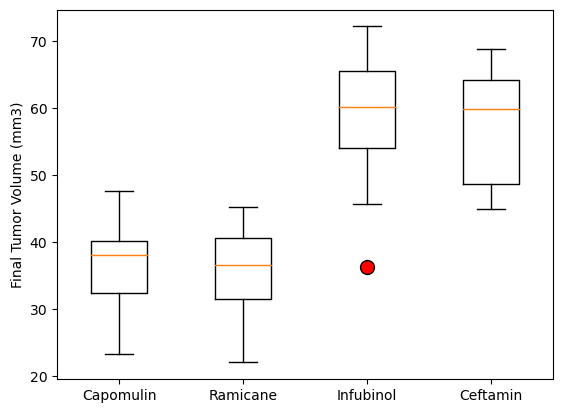

In [48]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
red_circle = dict(markerfacecolor = "red", markersize=10)
plt.boxplot([cap, ram, inf, ceft], labels= ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'],flierprops=red_circle)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

In [49]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin



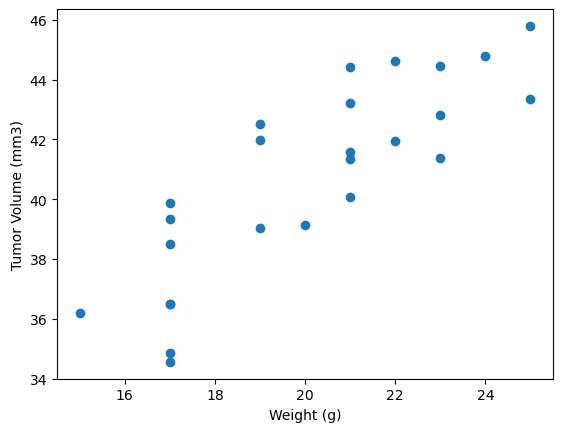

In [50]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
new_capomulin_df = clean_dataframe.loc[(clean_dataframe["Drug Regimen"]=="Capomulin")]
group_capomulin_df = new_capomulin_df.groupby("Mouse ID")
avg_tumor_vol = group_capomulin_df[("Tumor Volume (mm3)")].mean()
weight = group_capomulin_df["Weight (g)"].mean()
avg_capomulin_df = pd.DataFrame({"Weight (g)": weight,
                                 "Tumor Volume (mm3)": avg_tumor_vol})
plt.scatter(weight, avg_tumor_vol)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


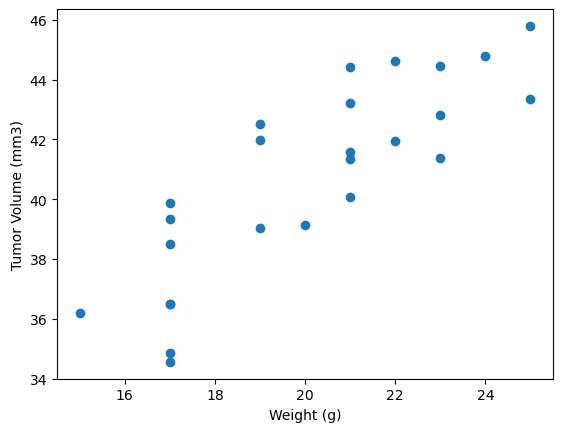

In [52]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr (weight, avg_tumor_vol)
print (f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")
value_x = avg_capomulin_df["Weight (g)"]
y_values = avg_capomulin_df["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, avg_tumor_vol)
regress_values = (value_x, y_values)
line_equation = "y =" + str(round(slope,2))+ "x +" + str(round(intercept,2))
plt.scatter(value_x, y_values)
#plt.plot(value_x,regress_values, "r-")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()
